# Sales Python Project

ANDRIALAMPISON Manoa
BRACARENSE Natalia 
NORIEGA Hugo

## Data Preparation

First we import all libraries that are going to be used during the project. Then we open un the Sales file and read the first 10 lines to verify that the read was succesfull.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

sales = pd.read_csv('sales.csv')

sales.head(10)

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,CA-2016-115812,09/06/2016,2016,3,14/06/2016,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


We use 'info' to see all columns and the data type of each one.

In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Order Year     9994 non-null   int64  
 3   Order Quarter  9994 non-null   int64  
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9983 non-null   float64
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

As seen the column names have space in the names and the data types for dates are not the correct one. So we iterate each column to remove the unwanted spaces and dashes. Then we simply assigned the correct data type to the dates columns. We used 'info' again to verify the changes.

In [3]:
col_names = sales.columns
new_names = []

for col in col_names:
    temp_name = col.replace(" ", "_")
    new_names.append(temp_name.replace("-", "_"))
    
sales.columns = new_names

sales['Order_Date']=pd.to_datetime(sales['Order_Date'])
sales['Ship_Date']=pd.to_datetime(sales['Ship_Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Order_Date     9994 non-null   datetime64[ns]
 2   Order_Year     9994 non-null   int64         
 3   Order_Quarter  9994 non-null   int64         
 4   Ship_Date      9994 non-null   datetime64[ns]
 5   Ship_Mode      9994 non-null   object        
 6   Customer_ID    9994 non-null   object        
 7   Customer_Name  9994 non-null   object        
 8   Segment        9994 non-null   object        
 9   Country        9994 non-null   object        
 10  City           9994 non-null   object        
 11  State          9994 non-null   object        
 12  Postal_Code    9983 non-null   float64       
 13  Region         9994 non-null   object        
 14  Product_ID     9994 non-null   object        
 15  Category       9994 n

Now we decided to enrich the data set by adding important columns that are going to be used later on. And again we used .info() to verify the addition of the new columns.

In [4]:
sales['profit_rate'] = 100*sales.Profit/sales.Sales
sales['total_discount']=sales.Discount*sales.Sales
sales['profitable'] = sales.Profit.apply(lambda x: False if x<=0 else True)
sales['Price'] = (((sales.Sales)/(sales.Quantity)))
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9994 non-null   object        
 1   Order_Date      9994 non-null   datetime64[ns]
 2   Order_Year      9994 non-null   int64         
 3   Order_Quarter   9994 non-null   int64         
 4   Ship_Date       9994 non-null   datetime64[ns]
 5   Ship_Mode       9994 non-null   object        
 6   Customer_ID     9994 non-null   object        
 7   Customer_Name   9994 non-null   object        
 8   Segment         9994 non-null   object        
 9   Country         9994 non-null   object        
 10  City            9994 non-null   object        
 11  State           9994 non-null   object        
 12  Postal_Code     9983 non-null   float64       
 13  Region          9994 non-null   object        
 14  Product_ID      9994 non-null   object        
 15  Cate

### General Performance Analysis

In order to identify key points that contribute or harm our business profitability, we decided to conduct a general analysis of the data set to see what states, regions, categories and customer generate profits and losses. We will start with the general and state analysis, then move on to the study of regions, categories and customers.

In [5]:
sum(sales.profitable)

8058

We see that 8058 out of the 9994 purchases displayed in the dataset were profitable. An analysis of the profitable and non-profitable sales seems pertinent.

In [6]:
total_profit_state = sales.groupby('State').agg(total_profit=('Profit', 'sum'), total_sales=('Sales', 'sum'), total_discount=("total_discount", "sum")).reset_index()

print(total_profit_state.sort_values("total_profit", ascending = True))

                   State  total_profit  total_sales  total_discount
41                 Texas   -25729.3563  170188.0458    52296.363516
33                  Ohio   -16971.3766   78258.1360    28009.570600
36          Pennsylvania   -15559.9603  116511.9140    39110.805800
11              Illinois   -12607.8870   80166.1010    24717.789300
31        North Carolina    -7490.9122   55603.1640    18124.336200
4               Colorado    -6527.8579   32108.1180     9561.852600
40             Tennessee    -5341.6936   30661.8730    10171.409300
1                Arizona    -3427.9246   35282.0010    10090.262700
8                Florida    -3399.3017   89473.7080    28483.416100
35                Oregon    -1190.4705   17431.1500     4411.601000
48               Wyoming      100.1960    1603.1360      320.627200
46         West Virginia      185.9216    1209.8240      202.003200
32          North Dakota      230.1497     919.9100        0.000000
39          South Dakota      394.8283    1315.5

Texas is the state that present the highest total loss with a negative balance of more than 25 thousand dollars. On the other hand, California yields a high level of profit, amountin to almost 56 thousand dollars. However, total profits may be impacted by the number of purchases, the size of the population in the region, etc. In a way that it is not a great measurament for comparison. So, calculating the rate of profit as well as the reate of discount per state will enlighten the study.

In [7]:
total_profit_state['profit_rate']=100*total_profit_state.total_profit/total_profit_state.total_sales
total_profit_state

total_profit_state['discount_rate']=100*total_profit_state.total_discount/total_profit_state.total_sales
total_profit_state

total_profit_state ["Abbrev."]=["AL", 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC','FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [8]:
total_profit_state = total_profit_state[['State','Abbrev.', 'total_profit','total_sales','total_discount','profit_rate','discount_rate']]


print (total_profit_state.sort_values('profit_rate', ascending = True) )

                   State Abbrev.  total_profit  total_sales  total_discount  \
33                  Ohio      OH   -16971.3766   78258.1360    28009.570600   
4               Colorado      CO    -6527.8579   32108.1180     9561.852600   
40             Tennessee      TN    -5341.6936   30661.8730    10171.409300   
11              Illinois      IL   -12607.8870   80166.1010    24717.789300   
41                 Texas      TX   -25729.3563  170188.0458    52296.363516   
31        North Carolina      NC    -7490.9122   55603.1640    18124.336200   
36          Pennsylvania      PA   -15559.9603  116511.9140    39110.805800   
1                Arizona      AZ    -3427.9246   35282.0010    10090.262700   
35                Oregon      OR    -1190.4705   17431.1500     4411.601000   
8                Florida      FL    -3399.3017   89473.7080    28483.416100   
48               Wyoming      WY      100.1960    1603.1360      320.627200   
46         West Virginia      WV      185.9216    12

When we do the analysis in terms of profit rate, we see that Ohio is the stae that performs the wors, followed by Colorado, Tennessee, Illinois and only then Texas. One point that we can observe by the graph is that these 5 states, among others, have a high rate of discount as well, above 30%. In contrast, the states with the highest profit rate do not tend to offer high discounts to their customers. some graphical analysis will help us visualize better and see how systemic is this inverse relationship between profit and discount rates in our database.

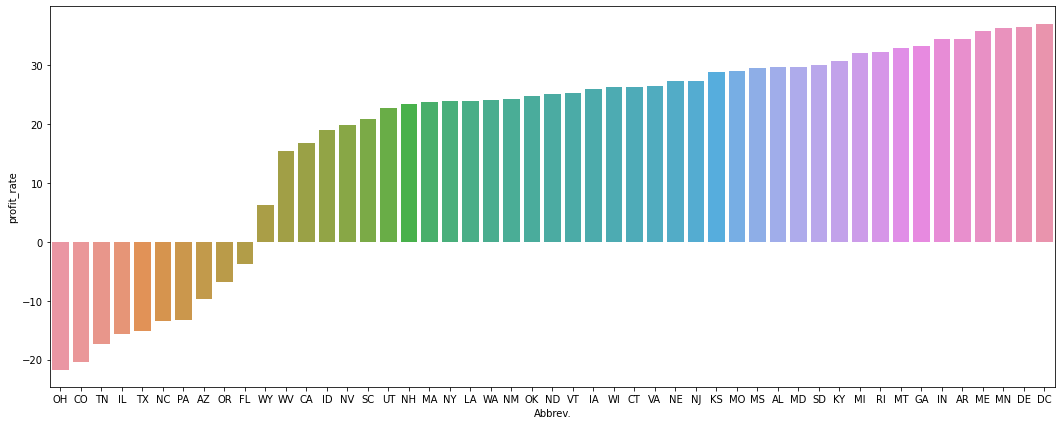

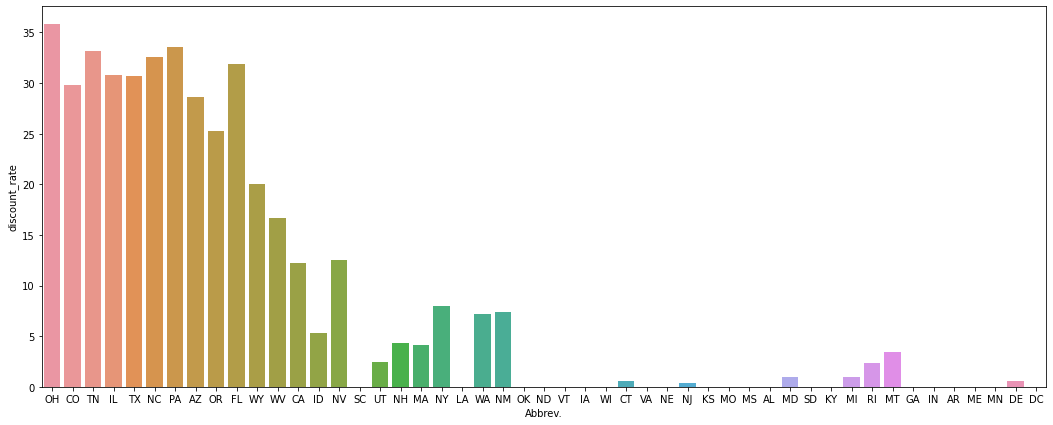

In [9]:
order = total_profit_state.sort_values('profit_rate')

plt.figure( figsize = (18, 7) )
chart= sb.barplot(data=order, x='Abbrev.', y='profit_rate')
plt.figure( figsize = (18, 7) )
chart= sb.barplot(data=order, x='Abbrev.', y='discount_rate')

When we look at the two graphs above, it becomes clear that all the states with negative profits offer high discount rates to their customers. This indicates that in general the strategy of giving clients discount does not necessarily result in higher profits. This is not to say that such policy is bad, however, deeper analysis on the subjected is necessary. Let us, then, first look at the correlation between profit and discount rate per states and per region.

In [10]:
regions = []
for state in order.State:
    temp = sales.loc[sales['State']==state]
    regions.append((repr(temp.head(1).Region).split()[1]))
order["Region"]=regions
order

,State,Abbrev.,total_profit,total_sales,total_discount,profit_rate,discount_rate,Region
33,Ohio,OH,-16971.3766,78258.1360,28009.570600,-21.686405,35.791257,East
4,Colorado,CO,-6527.8579,32108.1180,9561.852600,-20.330864,29.780171,West
40,Tennessee,TN,-5341.6936,30661.8730,10171.409300,-17.421289,33.172824,South
11,Illinois,IL,-12607.8870,80166.1010,24717.789300,-15.727205,30.833219,Central
41,Texas,TX,-25729.3563,170188.0458,52296.363516,-15.118192,30.728576,Central
31,North Carolina,NC,-7490.9122,55603.1640,18124.336200,-13.472097,32.595872,South
36,Pennsylvania,PA,-15559.9603,116511.9140,39110.805800,-13.354823,33.568074,East
1,Arizona,AZ,-3427.9246,35282.0010,10090.262700,-9.715789,28.598896,West
35,Oregon,OR,-1190.4705,17431.1500,4411.601000,-6.829558,25.308720,West
8,Florida,FL,-3399.3017,89473.7080,28483.416100,-3.799219,31.834398,South


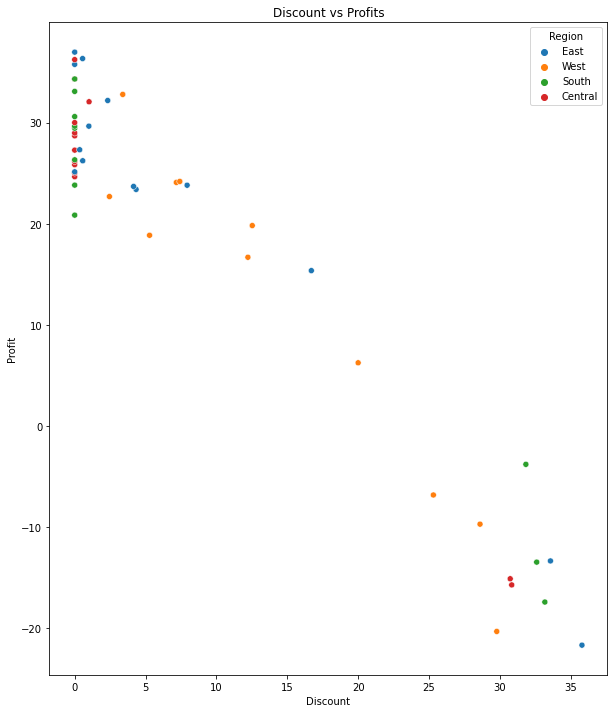

In [11]:
plt.figure( figsize = (10, 12) )
chart=sb.scatterplot(data=order, x='discount_rate', y='profit_rate', hue="Region")
chart.set_title('Discount vs Profits')
chart.set_xlabel('Discount')
chart.set_ylabel('Profit')
plt.show()

There is clearly a negative correlation between the profit rate and the discount rate. Moreover, this relationship can be more clearly observed in the Western region, where the store has experimented with several different levels of discount which impacted their profit rate negatively. Similar observations can be made about the Eastern region, however, with less confidence--as the store has mostly not given discounts in this Region, except in two States (Pensilvania and West Virginia). Finally, in the South clients in the States with very low profit rates are not too sensitive to discount--the same leve of discount has different outcomes for Tennessess, North Carolina and Florida. Similar assertions can be made for the Central region. An important conclusion drawn for this analysis is that average discounts per state should not be greater than 15% as all states who offered a discount greater than 15% made a loss regardless of the region we are in. The questions raise by this analysis leads us to pursue a regional study of the store performance as well as a more detailed study by categories and of customers' behavior.

### Regional Performance Analysis

In [12]:
total_profit_region = sales.groupby('Region').agg(total_profit=('Profit', 'sum'), total_sales=('Sales', 'sum'), total_discount=('total_discount', 'sum')).reset_index()

In [13]:
total_profit_region['profit_rate']=100*total_profit_region.total_profit/total_profit_region.total_sales
total_profit_region['discount_rate']=100*total_profit_region.total_discount/total_profit_region.total_sales
total_profit_region

,Region,total_profit,total_sales,total_discount,profit_rate,discount_rate
0,Central,39706.3625,501239.8908,77787.663216,7.921629,15.519049
1,East,91522.7800,678781.2400,94608.634200,13.483399,13.938015
2,South,46749.4303,391721.9050,56779.161600,11.934342,14.494763
3,West,108418.4489,725457.8245,93406.675325,14.944831,12.875549


The table above shows that the Western and Estern regions are the most profitable ones, followed by the Southern region. The Central area of the US is the least profitable with a margin of 7.91%.

In [14]:
def values_on_bars(chart):
    for p in chart.patches:
        if p.get_height() != 0:
            chart.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., 
                           p.get_height()), 
                           ha = 'center', 
                           va = 'center',
                           xytext = (0, 10), 
                           textcoords = 'offset points')

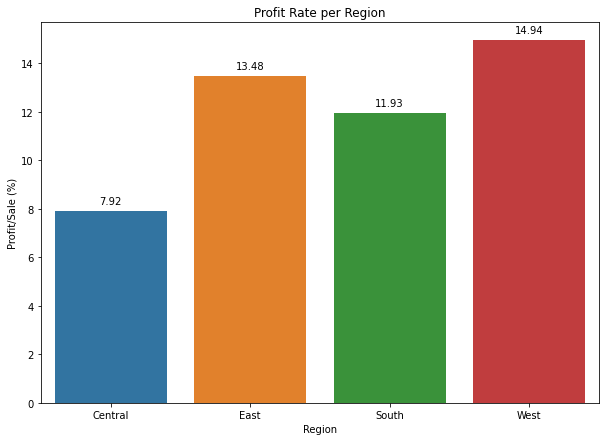

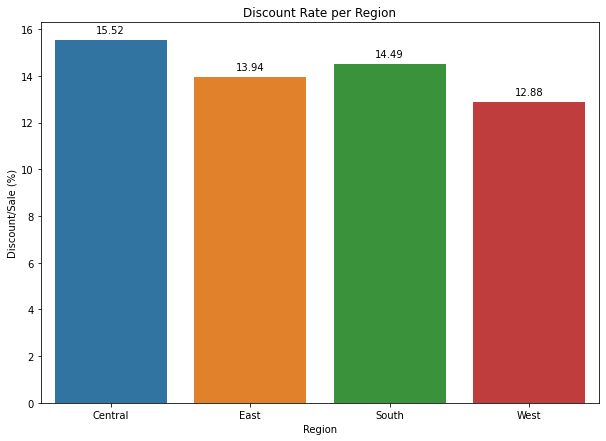

In [15]:
plt.figure( figsize = (10, 7) )
chart=sb.barplot(data=total_profit_region, x='Region',y='profit_rate', ci=None)
chart.set_title('Profit Rate per Region')
chart.set_xlabel('Region')
chart.set_ylabel('Profit/Sale (%)')
values_on_bars(chart)
plt.show()

plt.figure( figsize = (10, 7) )
chart=sb.barplot(data=total_profit_region, x='Region',y='discount_rate', ci=None)
chart.set_title('Discount Rate per Region')
chart.set_xlabel('Region')
chart.set_ylabel('Discount/Sale (%)')
values_on_bars(chart)
plt.show()

The two charts, however, show that by Region we do not find a straightforward relationship between discount rate and profit rate. So, to identify what exactly is the issue in the Central and Southern regions a more detailed study is needed. For that end, we broke down the analysis in terms of evolution over time and categories.

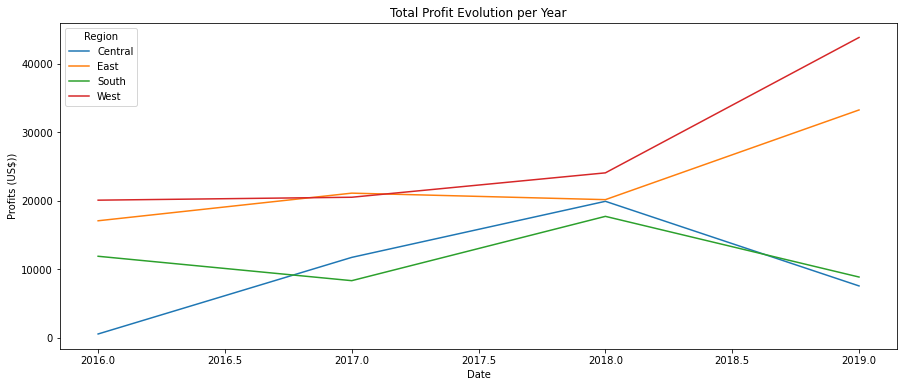

In [16]:
by_year_region_profit = sales.groupby(['Order_Year', 'Region']).agg(total_profit=('Profit', 'sum'), total_sales=('Sales', 'sum'), total_discount=('total_discount', 'sum'), total_quantity=("Quantity", 'sum')).reset_index()
by_year_region_profit['profit_rate']=100*by_year_region_profit.total_profit/by_year_region_profit.total_sales
by_year_region_profit['discount_rate']=100*by_year_region_profit.total_discount/by_year_region_profit.total_sales
by_year_region_profit['average_price']=by_year_region_profit.total_sales/by_year_region_profit.total_quantity

plt.figure( figsize = (15, 6))
chart=sb.lineplot(data=by_year_region_profit, x='Order_Year', hue="Region", y='total_profit')
chart.set_title('Total Profit Evolution per Year')
chart.set_xlabel('Date')
chart.set_ylabel('Profits (US$))')
plt.show()

The graph above demonstrates clearly that total profits decreased in the Southern and Central regions starting in the first have of 2018, meanwhile, total profits experienced a steep increase in the West and East. Nonetheless, this contrast cannot be explained by total sales. In fact, when we look at the graph below, we see that sales have increased, though at different paces, in all regions, except Central where it remained constant. Thus, further analysis is necessary to understand the source of the problem.

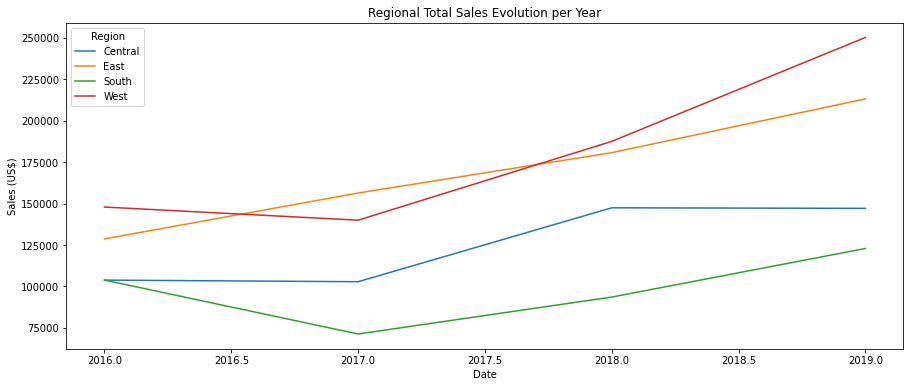

In [17]:
plt.figure( figsize = (15, 6))
chart=sb.lineplot(data=by_year_region_profit, x='Order_Year', hue="Region", y='total_sales')
chart.set_title('Regional Total Sales Evolution per Year')
chart.set_xlabel('Date')
chart.set_ylabel('Sales (US$)')
plt.show()

When we look at total discount we see that for the South, there is a clear negative relationship between total discount and total profits, which indicates that the strategy of increasing discount in the region is not worthy for the firm. In order to propose a new strategy it would be interesting to look at discount and profit rates.

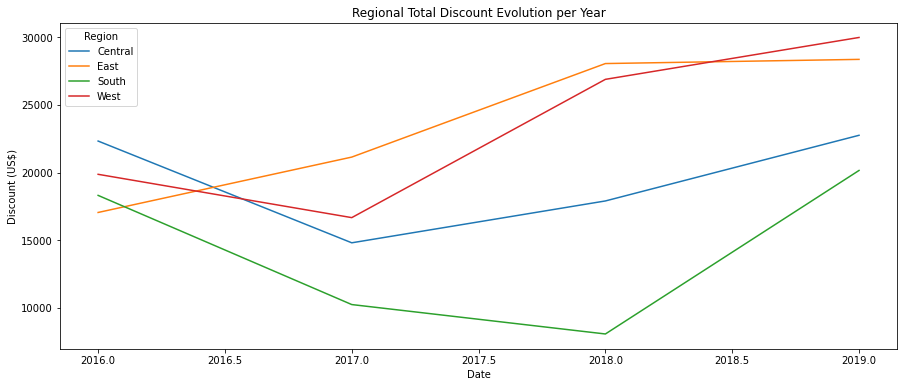

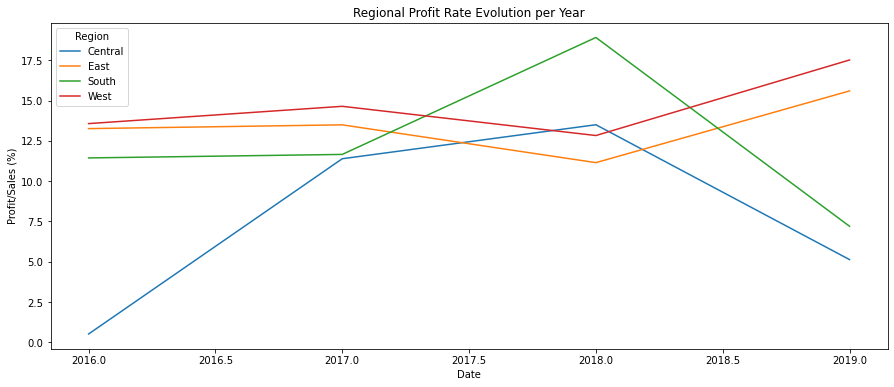

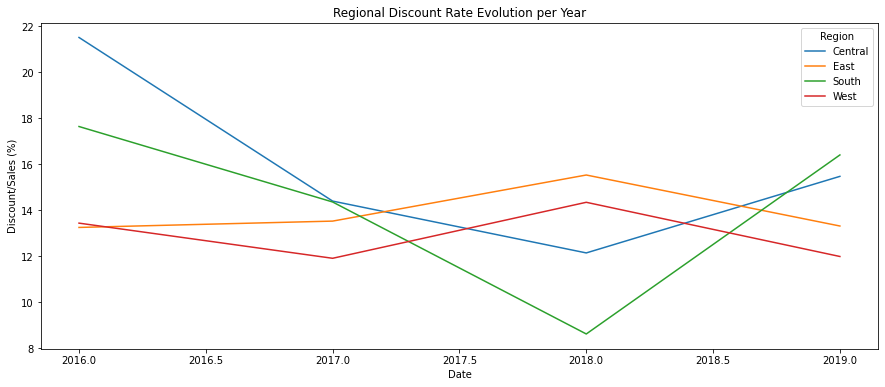

In [18]:
plt.figure( figsize = (15, 6))
chart=sb.lineplot(data=by_year_region_profit, x='Order_Year', hue="Region", y='total_discount')
chart.set_title('Regional Total Discount Evolution per Year')
chart.set_xlabel('Date')
chart.set_ylabel('Discount (US$)')
plt.show()

plt.figure( figsize = (15, 6))
chart=sb.lineplot(data=by_year_region_profit, x='Order_Year', hue="Region", y='profit_rate')
chart.set_title('Regional Profit Rate Evolution per Year')
chart.set_xlabel('Date')
chart.set_ylabel('Profit/Sales (%)')
plt.show()

plt.figure( figsize = (15, 6))
chart=sb.lineplot(data=by_year_region_profit, x='Order_Year', hue="Region", y='discount_rate')
chart.set_title('Regional Discount Rate Evolution per Year')
chart.set_xlabel('Date')
chart.set_ylabel('Discount/Sales (%)')
plt.show()

Discounts is not a good strategy for the Southern region. In fact, discount rate shows an inverse relationship with profit rate in this region. When we look at the table below, we see that keeping discount rate at about 8% is ideal for the Soutern customers.

In [19]:
by_year_region_profit1=by_year_region_profit.sort_values("Region")
by_year_region_profit1

,Order_Year,Region,total_profit,total_sales,total_discount,total_quantity,profit_rate,discount_rate,average_price
0,2016,Central,539.5534,103838.1646,22327.108412,1726,0.519610,21.501833,60.161161
4,2017,Central,11716.8020,102874.2220,14807.261440,1815,11.389444,14.393559,56.680012
8,2018,Central,19899.1629,147429.3760,17900.532280,2359,13.497421,12.141768,62.496556
12,2019,Central,7550.8442,147098.1282,22752.761084,2880,5.133202,15.467743,51.075739
1,2016,East,17059.6095,128680.4570,17049.131500,1986,13.257343,13.249200,64.793785
5,2017,East,21091.0130,156332.0570,21142.250900,2382,13.491163,13.523938,65.630586
9,2018,East,20141.5961,180685.8220,28054.198400,2839,11.147303,15.526508,63.644178
13,2019,East,33230.5614,213082.9040,28363.053400,3411,15.595133,13.310807,62.469336
2,2016,South,11879.1200,103845.8435,18311.182025,1336,11.439187,17.633043,77.728925
6,2017,South,8318.5940,71359.9805,10243.613525,1344,11.657226,14.354844,53.095224


From the table above, we can conclude that discounts is not a good strategy, in fact we see that customers did not respond at all to the decrease in price between 2016 and 2017. Also, increases in price in 2018 and 2019, impact the quantities positively. Meaning that customers in this area see discount negatively. Now we are going to analyze categories and sub categories.

### Category and Sub-Category Analysis

Text(0, 0.5, 'Profit')

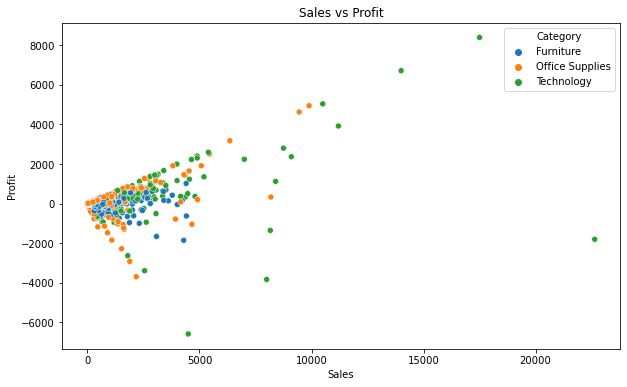

In [20]:
plt.figure(figsize=(10,6))
chart=sb.scatterplot(data=sales, x='Sales',y='Profit',hue='Category')
chart.set_title('Sales vs Profit')
chart.set_xlabel('Sales')
chart.set_ylabel('Profit')

The Technology category seems to be more advantageous (both most profitable and most sold overall), then the Office supplies one and finally,the Furnitures category results seem quite low in comparison.

Next we focus on the yearly sales evolution per category.

Text(0, 0.5, 'Total Sales')

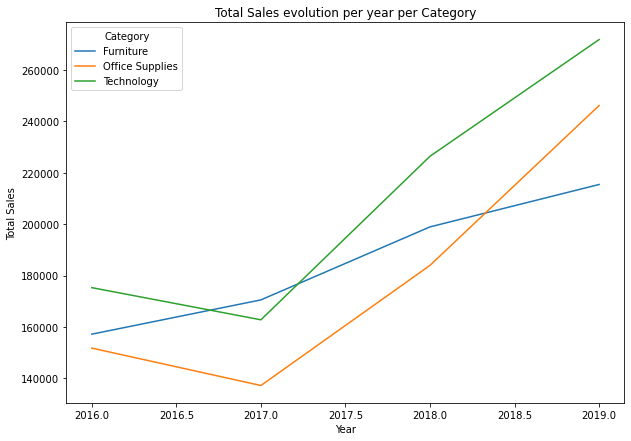

In [21]:
by_year_cat_sales = sales.groupby(['Order_Year','Category']).Sales.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_cat_sales, x='Order_Year',hue= 'Category',y='Sales',ci=None)
chart.set_title('Total Sales evolution per year per Category')
chart.set_xlabel('Year')
chart.set_ylabel('Total Sales')

Here we observe two main things:
1.There was a descrease in the Technology category sales in 2017.What happened?
2.Since 2018, the category Office Supplies surpassed the Furniture one. How could we explain it?

Now let's look at the yearly discount evolution per Category to see if we find any answer.

Text(0, 0.5, 'Total Discount')

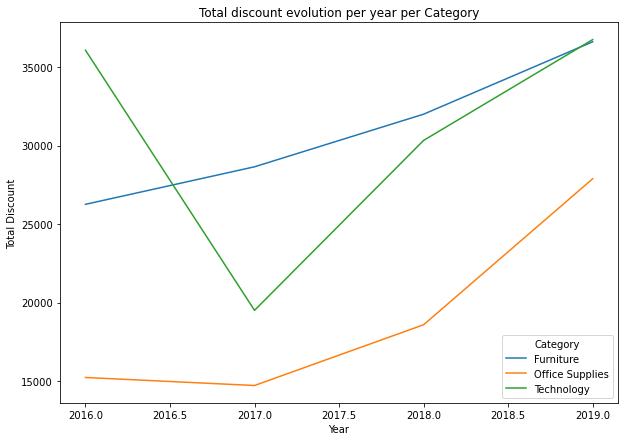

In [22]:
by_year_cat_sales = sales.groupby(['Order_Year','Category']).total_discount.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_cat_sales, x='Order_Year',hue= 'Category',y='total_discount',ci=None)
chart.set_title('Total discount evolution per year per Category')
chart.set_xlabel('Year')
chart.set_ylabel('Total Discount')

By looking at the discount evolution per category, we find an explanation to our first previous question: We thus observe that our store's customers are very price sensitive, since the discounts and the sales evolutions are similar. For example: the store decided to lower its discounts on the Technology category in 2017 which resulted in a decrease in sales.



Text(0, 0.5, 'Sum Price')

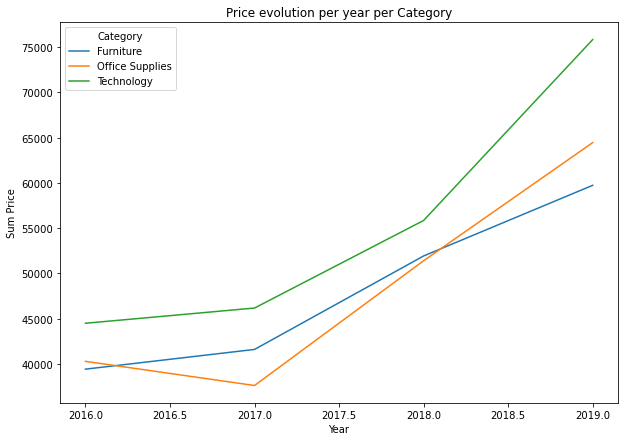

In [23]:
by_year_cat_sales = sales.groupby(['Order_Year','Category']).Price.sum().reset_index()
plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_cat_sales, x='Order_Year',hue= 'Category',y='Price',ci=None)
chart.set_title('Price evolution per year per Category')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Price')

To answer our previous second question, the price evolution indicates a change in the store's price strategy, which partially explains why the Office supplies category surpasses the Furnitures one in 2018.

Text(0, 0.5, 'Sum Quantity')

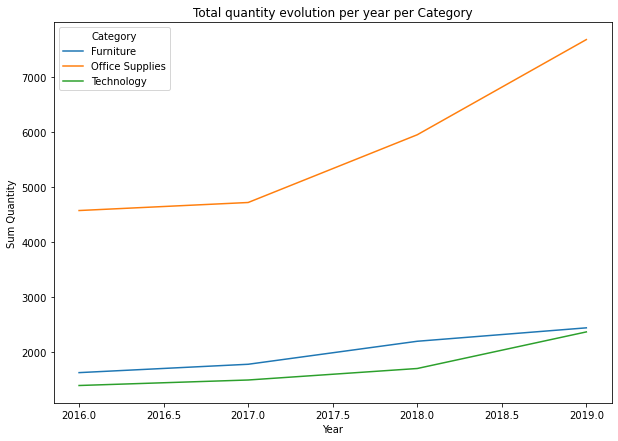

In [24]:
by_year_cat_sales = sales.groupby(['Order_Year','Category']).Quantity.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_cat_sales, x='Order_Year',hue= 'Category',y='Quantity',ci=None)
chart.set_title('Total quantity evolution per year per Category')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Quantity')

Finally, by looking at the quantity evolution, and to answer our previous second question, we can say that the change in the store's price strategy lead to an increase of quantities sold for the Office supplies in 2018 while the Furniture category evolution remained quite stable. 

Let's now dig deeper by looking at the Subcategory level.

In [25]:
sales.Sub_Category.unique()
qty_mean_subcat = sales.groupby('Sub_Category').Quantity.mean()
print(type(qty_mean_subcat))
qty_mean_subcat.sort_values(ascending=False)


<class 'pandas.core.series.Series'>


Sub_Category
Fasteners      4.211982
Binders        3.922521
Tables         3.890282
Labels         3.846154
Accessories    3.840000
Machines       3.826087
Chairs         3.818476
Bookcases      3.807018
Paper          3.779562
Art            3.768844
Storage        3.732861
Furnishings    3.723093
Appliances     3.710300
Phones         3.699663
Envelopes      3.566929
Copiers        3.441176
Supplies       3.405263
Name: Quantity, dtype: float64

The first Subcategories in terms of quantities sold are Fasteners, Binders, labels... Which is normal because these are little office supplies.

<AxesSubplot:xlabel='Sub_Category', ylabel='Sales'>

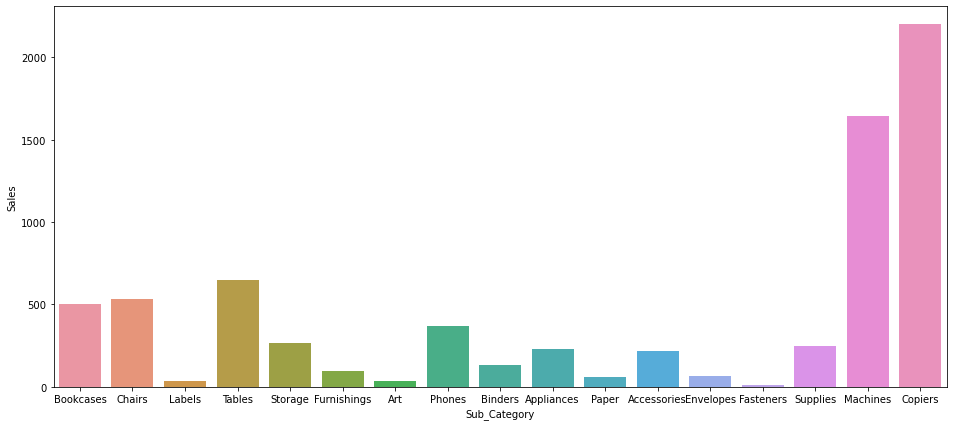

In [26]:
plt.figure(figsize=(16,7))
sb.barplot(data=sales, x='Sub_Category', y='Sales',ci=None)

We observe that in terms of sales, the first Subcategories are Copiers and Machines, then come Tables, Chairs. But has it always been the case? 

Let's look at the yearly sales evolution per SubCategory

Text(0, 0.5, 'Total Sales')

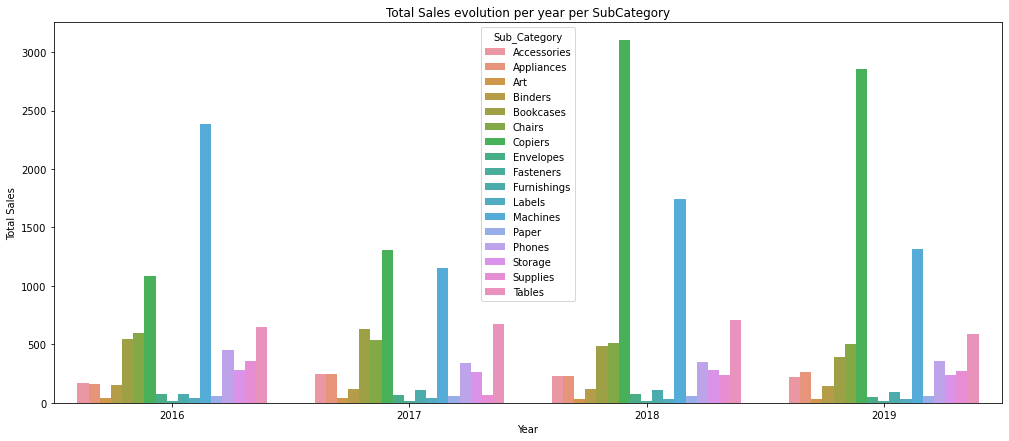

In [27]:
by_year_cat_sales = sales.groupby(['Order_Year','Sub_Category']).Sales.mean().reset_index()

plt.figure(figsize=(17,7))
chart=sb.barplot(data=by_year_cat_sales, x='Order_Year',hue= 'Sub_Category',y='Sales',ci=None)
chart.set_title('Total Sales evolution per year per SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Total Sales')

We now see some changes:
While the first Subcategory in terms of sales is Copiers in 2019, it used to be Machines back in 2016.
1. What happened?
2. We also observe that the other Subcategories sales remain similar over the years.

This graph about the Yearly sales evolution per SubCategory will be the sales reference for 
the following observations, subcategories per subcategories.

Let's have a closer look to each SubCategory.

In [28]:
fhand_Technology = sales[sales['Category']=='Technology']
fhand_Technology.head()

,Order_ID,Order_Date,Order_Year,Order_Quarter,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,profit_rate,total_discount,profitable,Price
7,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,10.00,181.4304,True,151.192
11,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568,7.50,182.2848,True,227.856
19,CA-2016-143336,2016-08-27,2016,3,2016-01-09,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,...,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,7.50,42.6960,True,71.160
26,CA-2018-121755,2018-01-16,2018,1,2018-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,...,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741,13.00,0.0000,True,30.190
35,CA-2018-117590,2018-08-12,2018,3,2018-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,...,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,11.25,219.5088,True,156.792


Text(0, 0.5, 'Sum Quantity')

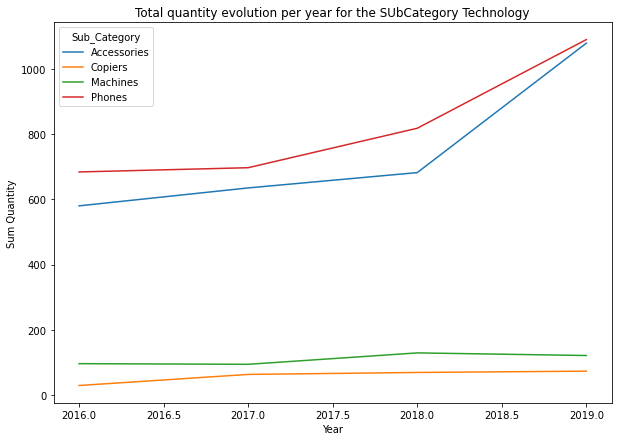

In [29]:
by_year_tech_quantity = fhand_Technology.groupby(['Order_Year','Sub_Category']).Quantity.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_tech_quantity, x='Order_Year',hue= 'Sub_Category',y='Quantity',ci=None)
chart.set_title('Total quantity evolution per year for the SUbCategory Technology')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Quantity')

In terms of quantities sold, the level for Machines and Copiers remained stable over the years.

Let's look if the answer to our previous first question lies in the price and discount evolutions.


Text(0, 0.5, 'Sum Price')

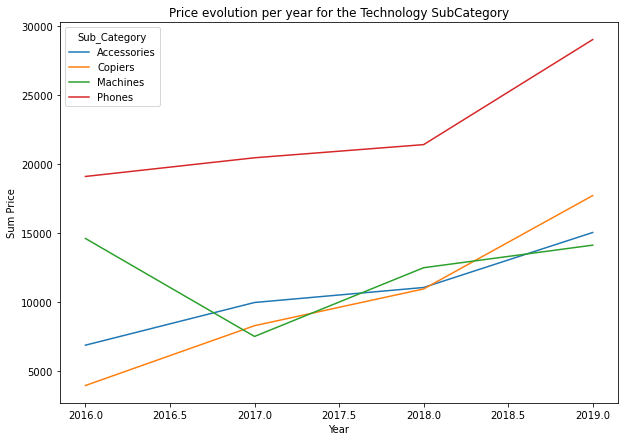

In [30]:
by_year_tech_price = fhand_Technology.groupby(['Order_Year','Sub_Category']).Price.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_tech_price, x='Order_Year',hue= 'Sub_Category',y='Price',ci=None)
chart.set_title('Price evolution per year for the Technology SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Price')

But question here: why are Phones far behind Copiers and Machines in terms of sales while Phones are more expensive and more sold (than Copiers in quantity evolution and mean and than Machines in quantity evolution) ?

Answer: it is due to the higher discount rate.


Text(0, 0.5, 'Total Discount')

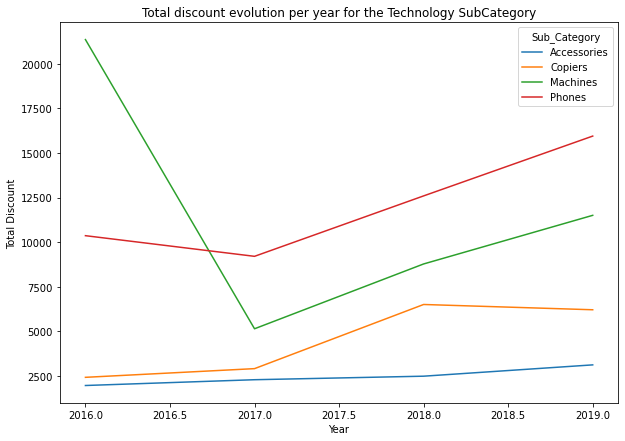

In [31]:
by_year_tech_discount = fhand_Technology.groupby(['Order_Year','Sub_Category']).total_discount.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_tech_discount, x='Order_Year',hue= 'Sub_Category',y='total_discount',ci=None)
chart.set_title('Total discount evolution per year for the Technology SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Total Discount')

Once again, the sales and the discount evolution seem to be strongly linked, since the drop in discount for Machines coincides with its sales decrease in 2017.On the opposite, the increase in discount for the Copiers boosted its sales. For the Technology Category then, and especially for the Machine and Copiers Subcategories, the customers seem to be highly price sensitive. However, the Accessories Subcategory is well sold without discount applied, even when its prices slighly increase. A good strategy for the store on the Technology category would then be to focus on the Copiers and Machines Subcategories.

Now, lets look at the SubCategory Office Supplies

In [32]:
fhand_Office = sales[sales['Category']=='Office Supplies']
fhand_Office.head()

,Order_ID,Order_Date,Order_Year,Order_Quarter,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,profit_rate,total_discount,profitable,Price
2,CA-2018-138688,2018-12-06,2018,4,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,47.00,0.0000,True,7.310
4,US-2017-108966,2017-11-10,2017,4,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,11.25,4.4736,True,11.184
6,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Art,Newell 322,7.280,4,0.0,1.9656,27.00,0.0000,True,1.820
8,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,31.25,3.7008,True,6.168
9,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,30.00,0.0000,True,22.980


Text(0, 0.5, 'Sum Quantity')

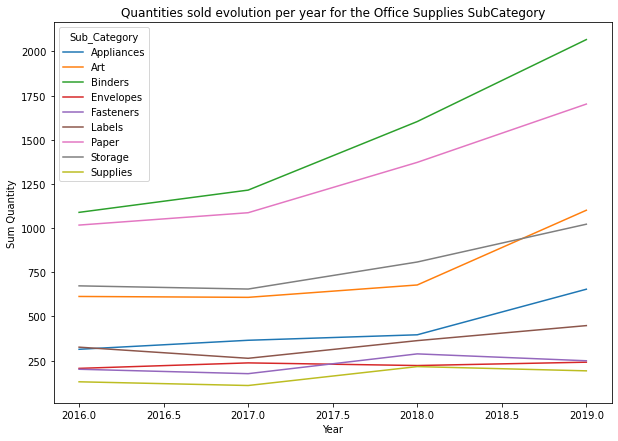

In [33]:
by_year_office_quantity = fhand_Office.groupby(['Order_Year','Sub_Category']).Quantity.sum().reset_index()
plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_office_quantity, x='Order_Year',hue= 'Sub_Category',y='Quantity',ci=None)
chart.set_title('Quantities sold evolution per year for the Office Supplies SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Quantity')

Even if Office Supplies is the most important Category in terms of quantities sold, its low prices don't enable it to have high sales results.

we continue to the yearly discount evolution for the Subcategory Office Supplies

Text(0, 0.5, 'Total Discount')

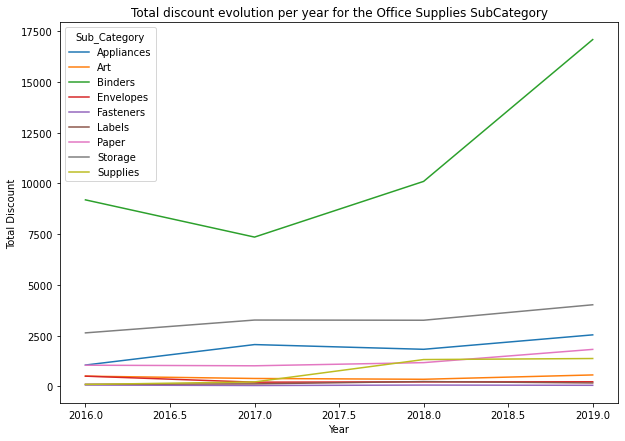

In [34]:
by_year_office_discount = fhand_Office.groupby(['Order_Year','Sub_Category']).total_discount.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_office_discount, x='Order_Year',hue= 'Sub_Category',y='total_discount',ci=None)
chart.set_title('Total discount evolution per year for the Office Supplies SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Total Discount')

Concerning the Discount strategy, the store doesn't seem to invest much in this SubCategory except for the Binders, but by looking at the sales evolution again, it does not seem to be efficient. We thus can say that this Subcategory is not necessarily price sensitive, not like the Machines and Copiers. Moreover, these products are well sold even if no discounts are applied.

Finally let's see For the SubCategory Furniture.

In [35]:
fhand_Furniture = sales[sales['Category']=='Furniture']
fhand_Furniture.head()

,Order_ID,Order_Date,Order_Year,Order_Quarter,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,profit_rate,total_discount,profitable,Price
0,CA-2018-152156,2018-08-11,2018,3,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.0,0.000000,True,130.9800
1,CA-2018-152156,2018-08-11,2018,3,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.0,0.000000,True,243.9800
3,US-2017-108966,2017-11-10,2017,4,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.0,430.909875,False,191.5155
5,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,29.0,0.000000,True,6.9800
10,CA-2016-115812,2016-09-06,2016,3,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,5.0,341.236800,True,189.5760


Text(0, 0.5, 'Sum Quantity')

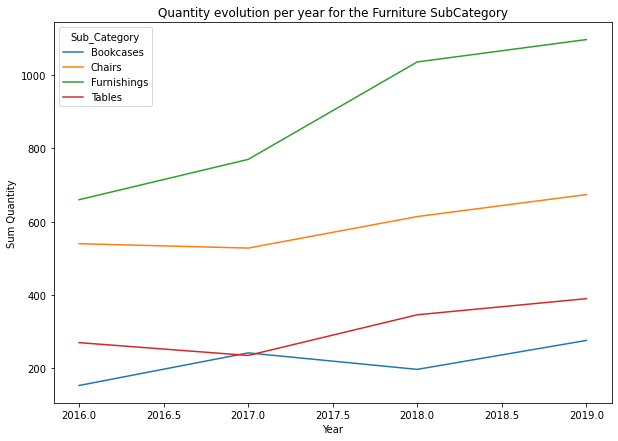

In [36]:
by_year_furniture_quantity = fhand_Furniture.groupby(['Order_Year','Sub_Category']).Quantity.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_furniture_quantity, x='Order_Year',hue= 'Sub_Category',y='Quantity',ci=None)
chart.set_title('Quantity evolution per year for the Furniture SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Quantity')

Text(0, 0.5, 'Sum Price')

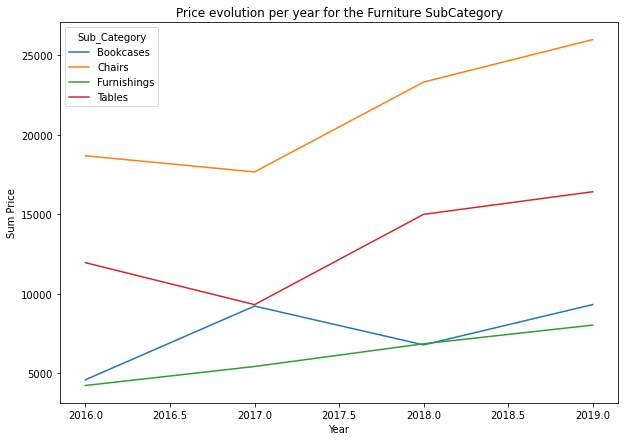

In [37]:
by_year_furniture_price = fhand_Furniture.groupby(['Order_Year','Sub_Category']).Price.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_furniture_price, x='Order_Year',hue= 'Sub_Category',y='Price',ci=None)
chart.set_title('Price evolution per year for the Furniture SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Sum Price')

Text(0, 0.5, 'Total Discount')

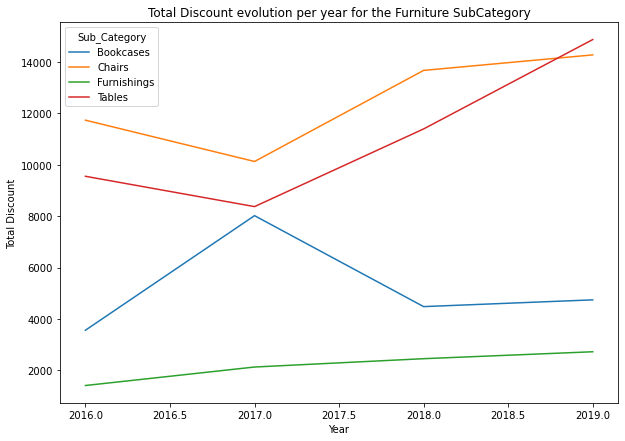

In [38]:
by_year_furniture_discount = fhand_Furniture.groupby(['Order_Year','Sub_Category']).total_discount.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_furniture_discount, x='Order_Year',hue= 'Sub_Category',y='total_discount',ci=None)
chart.set_title('Total Discount evolution per year for the Furniture SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Total Discount')


Even though there were changes in terms of quantities sold for the Subcategory Furniture due to changes in the price strategy and the discount strategy, which changed between 2016 and 2019 too for Chairs, Tables and Bookcases,the sales evolution of these products remained quite stable(cf.Yearly sales evolution per SubCategory).

For the Bookcases: One big change we can see on the sales evolution happened in 2017 when more Bookcases than Chairs were sold, which wasn't the case the other years. But it happened because of both a price and discount increase for Bookcases, Bookcases question: so was it really worth it?

Text(0, 0.5, 'Profit')

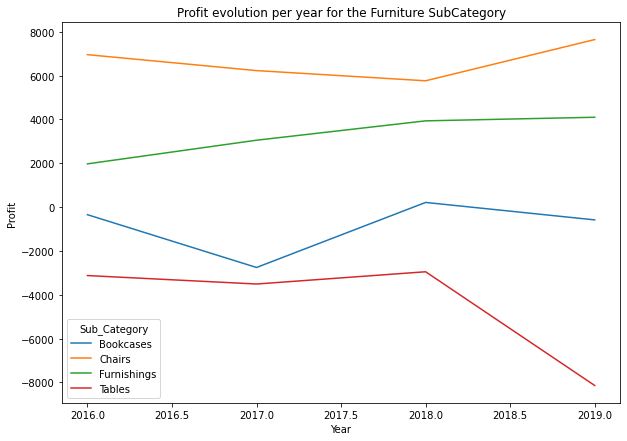

In [39]:
by_year_furniture_profit = fhand_Furniture.groupby(['Order_Year','Sub_Category']).Profit.sum().reset_index()

plt.figure(figsize=(10,7))
chart=sb.lineplot(data=by_year_furniture_profit, x='Order_Year',hue= 'Sub_Category',y='Profit',ci=None)
chart.set_title('Profit evolution per year for the Furniture SubCategory')
chart.set_xlabel('Year')
chart.set_ylabel('Profit')

Bookcases answer: The huge price increase for Bookcases in 2017, even if there was important discounts, was not profitable.
Tables: Concerning the Tables, it would be better if the discount evolution follows the price's evolution. like in 2017 (Tables price and discount both decrease, profit remains stable), while in 2018, the price slighly decreased whereas discounts kept increasing. Result: a drop in profit! We thus can say that these products are price sensitive, but less than the Technology subcategories

We recommend you to play with discounts for Technology subcategories: focus on this category which is highly price sensitive,
It could boost their sales. Additionally pay attention to the link between your price and discounts strategies for Tables, Chairs and Bookcases in the Furniture subcategories, but not to push too hard for the Office supplies category.

### Product association: product bundles

In order to perform the product association we needed to install a new library: mlxtend and then we imported the sub-libraries that we are going to be using.

In [40]:
pip install mlxtend

In [41]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

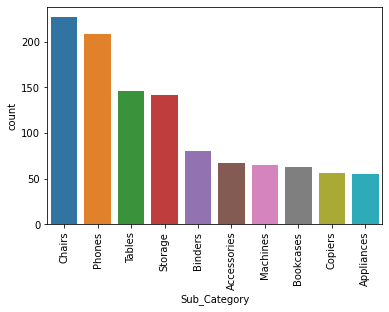

In [42]:
sales_500 = sales[sales['Sales']>500]
sb.countplot(x = 'Sub_Category', data = sales_500, order = sales_500['Sub_Category'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
df = sales_500.groupby(['Quantity','Sub_Category']).size().reset_index(name='count')
basket = (df.groupby(['Quantity', 'Sub_Category'])['count'].sum().unstack().reset_index().fillna(0).set_index('Quantity'))

In [43]:
def encode_units(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets

Sub_Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Quantity,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1
3,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1
4,1,1,0,1,1,1,1,0,1,0,1,0,1,1,1,1
5,1,1,0,1,1,1,1,0,1,0,1,0,1,1,1,1
6,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1
7,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1
8,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1
9,1,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1


In [44]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [45]:
rules = association_rules(frequent_itemsets, metric="lift")

In [46]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Appliances),(Accessories),0.714286,0.785714,0.714286,1.0,1.272727,0.153061,inf
1912207,"(Paper, Phones, Tables, Bookcases, Furnishings)","(Chairs, Accessories, Binders, Storage)",0.142857,0.714286,0.142857,1.0,1.400000,0.040816,inf
1912201,"(Paper, Phones, Tables, Binders, Furnishings)","(Storage, Chairs, Accessories, Bookcases)",0.142857,0.714286,0.142857,1.0,1.400000,0.040816,inf
1912202,"(Paper, Phones, Tables, Binders, Accessories)","(Storage, Chairs, Furnishings, Bookcases)",0.142857,0.500000,0.142857,1.0,2.000000,0.071429,inf
1912203,"(Paper, Phones, Binders, Furnishings, Accessor...","(Storage, Chairs, Tables, Bookcases)",0.142857,0.785714,0.142857,1.0,1.272727,0.030612,inf
1912204,"(Paper, Phones, Tables, Storage, Bookcases)","(Furnishings, Chairs, Binders, Accessories)",0.142857,0.500000,0.142857,1.0,2.000000,0.071429,inf
1912205,"(Paper, Phones, Storage, Bookcases, Furnishings)","(Chairs, Tables, Binders, Accessories)",0.142857,0.714286,0.142857,1.0,1.400000,0.040816,inf
1912206,"(Paper, Phones, Storage, Bookcases, Accessories)","(Furnishings, Chairs, Tables, Binders)",0.142857,0.500000,0.142857,1.0,2.000000,0.071429,inf
1912208,"(Paper, Phones, Tables, Bookcases, Accessories)","(Furnishings, Chairs, Binders, Storage)",0.142857,0.500000,0.142857,1.0,2.000000,0.071429,inf
1912199,"(Paper, Phones, Binders, Storage, Furnishings)","(Chairs, Accessories, Tables, Bookcases)",0.142857,0.714286,0.142857,1.0,1.400000,0.040816,inf


The objective of the market-basket analysis is to know which associations are more frequent, based on the analysis of the previous purchases, and thus to offer items that are usually bought in the same basket. We then recommend you to pay attention to the associations, which consequent support is high first (those about 0.428571 and 0.571429). Then secondly to pay attention to those which lift is about 14.0 but which consequent support is less important (about 0.071429), meaning that these products are 14 times as likely to appear together in the same basket, but that these associations appear less frequently. This is a way to do cross-selling that leads to 1) a revenue increase per existing customer, 2) a better customer retention.

But to be sure about the customer retention, let's dig deeper into the customer behaviour analysis.

### Focusing on Customers

To measure customer related topics it's necessary to create a new data frame grouping important info from the data set. The topics we want to look to is Customer Retention, Active Customer Volume, Buying Frequency. So from the original data set we kept relevant info as Order Date and Order Year. To do the grouping we based it on unique Customer Id.

In [47]:
users = pd.unique(sales['Customer_ID'])
ed, rd, dd, yd, ym, no, ni, adtb = [], [], [], [], [], [], [], []

for user in users:
    temp = sales.loc[sales['Customer_ID'] == user]
    avg_Sales = temp.Sales.mean()
    ed.append(temp.Order_Date.min())
    rd.append(temp.Order_Date.max())
    yd.append(temp.Order_Year.max())
    ym.append(temp.Order_Year.min())
    ni.append(len(temp))
    no.append(len(pd.unique(temp['Order_ID'])))
    
for i in range(len(ed)):
    tmp = pd.to_datetime(rd[i])-pd.to_datetime(ed[i])
    dd.append(tmp)
    tmp_diff = tmp.days/no[i]
    adtb.append(tmp_diff)
    
user_data = pd.DataFrame(
    {'User_ID':users, 
      'First_Order':ed, 
      'Last_Order':rd, 
      'Date_Difference':dd,
      'Year_Last_Order':yd,
      'Year_First_Order':ym,
      'Number_Orders':no,
      'Number_Items':ni,
      'Avg_dbp':adtb})
user_data.head(20)

,User_ID,First_Order,Last_Order,Date_Difference,Year_Last_Order,Year_First_Order,Number_Orders,Number_Items,Avg_dbp
0,CG-12520,2017-10-15,2019-01-26,468 days,2019,2017,3,5,156.000000
1,DV-13045,2018-09-23,2019-11-12,415 days,2019,2018,5,9,83.000000
2,SO-20335,2017-04-12,2019-09-09,880 days,2019,2017,6,15,146.666667
3,BH-11710,2016-09-06,2019-07-12,1039 days,2019,2016,8,24,129.875000
4,AA-10480,2016-04-05,2019-04-15,1105 days,2019,2016,4,12,276.250000
5,IM-15070,2016-12-19,2018-06-23,551 days,2018,2016,7,21,78.714286
6,HP-14815,2016-06-05,2019-11-30,1273 days,2019,2016,7,10,181.857143
7,PK-19075,2016-11-11,2019-12-21,1135 days,2019,2016,12,25,94.583333
8,AG-10270,2016-05-13,2019-03-27,1048 days,2019,2016,5,14,209.600000
9,ZD-21925,2016-08-27,2019-11-06,1166 days,2019,2016,5,9,233.200000


The first thing to look at is the active custumer volume. With this we can tell how many customers are still active and also we can tell how many customers stoped buying each year.

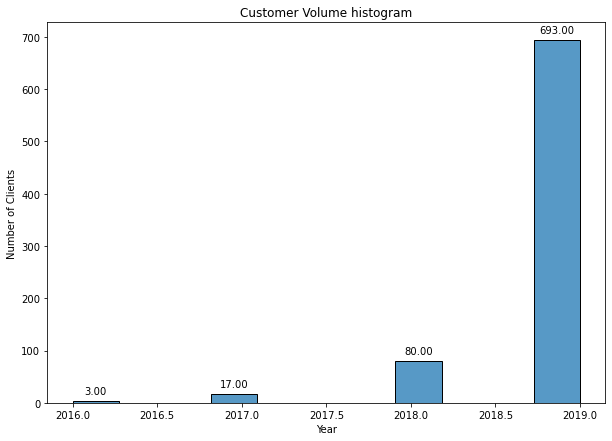

In [48]:
plt.figure( figsize = (10, 7) )
customer_vol = sb.histplot(user_data, x="Year_Last_Order")
customer_vol.set_title('Customer Volume histogram')
customer_vol.set_ylabel('Number of Clients')
customer_vol.set_xlabel('Year')
values_on_bars(customer_vol)

From the graph above we can see that yearly the store lost very few customers, specially in 2016 and 2017. In 2018 we can see that they lost the bisggest amount with 80 customers. We can ignore the graph on 2019 since these represent the customers who have recently bought items from the store.

Now that we know how many customers we have lost over the years, we want to know exactly which years did the store adquire more customers.

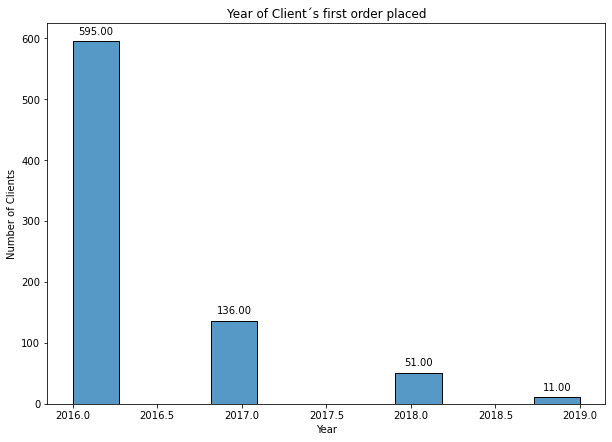

In [49]:
plt.figure( figsize = (10, 7) )
g_fo=sb.histplot(user_data, x="Year_First_Order")
g_fo.set_title('Year of Client´s first order placed')
g_fo.set_ylabel('Number of Clients')
g_fo.set_xlabel('Year')
values_on_bars(g_fo)

The graph above indicates customer gain over the years. As we can see, most of our customers were adquire in 2016 and from here the custumer adqusition have being lowering each year. In contrast to the graph of cutomer loss we can asume we have very loya customers. 

Another important question raised is how many orders do each customer buy in total. 

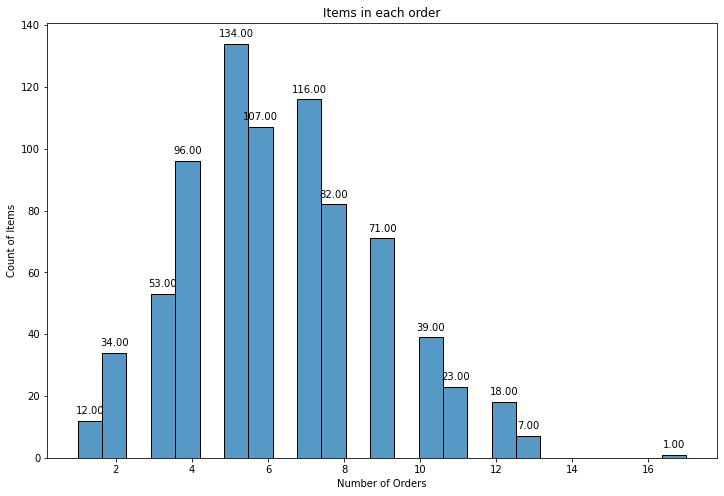

In [50]:
plt.figure( figsize = (12, 8) )
g_ic = sb.histplot(user_data, x="Number_Orders")
g_ic.set_title('Items in each order')
g_ic.set_xlabel('Number of Orders')
g_ic.set_ylabel('Count of Items')
values_on_bars(g_ic)
#number of items per customer

as we can observe in the histogram above, most customers order between 5-8 orders. Another interesting fact to see is that we have one customer who ordered more than 16 times. The conlcution noticed from the customer analysis is that customer adquisition is not performing well at all in the recent years, and contrary to that customer retention is doign very good. The store needs to analyse what actions happened in 2016 that attracted so many customers and see how thay can do the same or change their strategy that they've got during the current years.

Now that we know this info on customer orders we need to go deeper in Orders.

### Focusing on Orders
Next topic to cover are all the data related to Orders. We wanted to know more about orders, like total sales, total profits, items per order and we wanted to see what we can find from the shiping date. To achive this we did the same procedure and created a new data frame with all the important information. The new data frame contains the following columns: order_id, total_sales, total_profit, items, order_date, ship_date, date_difference.

In [51]:
orders = pd.unique(sales['Order_ID'])
ots, otp, ni, sd, od, dd2 = [],[],[],[],[], []

for order in orders:
    temp = sales.loc[sales['Order_ID']==order]
    ots.append(temp.Sales.sum())
    otp.append(temp.Profit.sum())
    ni.append(len(temp))
    od.append(temp.Order_Date.min())
    sd.append(temp.Ship_Date.min())
    
for i in range(len(sd)):
    tmp = pd.to_datetime(sd[i])-pd.to_datetime(od[i])
    dd2.append(tmp.days)
    

order_data = pd.DataFrame({
    'order_id':orders,
    'total_sales':ots,
    'total_profit':otp,
    'items':ni,
    'Order_Date':od,
    'Ship_Date':sd,
    'Date_Difference':dd2
    })

order_data.head(20)

,order_id,total_sales,total_profit,items,Order_Date,Ship_Date,Date_Difference
0,CA-2018-152156,993.9000,261.4956,2,2018-08-11,2018-11-11,92
1,CA-2018-138688,14.6200,6.8714,1,2018-12-06,2018-06-16,-173
2,US-2017-108966,979.9455,-380.5146,2,2017-11-10,2017-10-18,-23
3,CA-2016-115812,3714.3040,300.7687,7,2016-09-06,2016-06-14,-84
4,CA-2019-114412,15.5520,5.4432,1,2019-04-15,2019-04-20,5
5,CA-2018-161389,407.9760,132.5922,1,2018-05-12,2018-10-12,153
6,US-2017-118983,71.3540,-127.6740,2,2017-11-22,2017-11-26,4
7,CA-2016-105893,665.8800,13.3176,1,2016-11-11,2016-11-18,7
8,CA-2016-167164,55.5000,9.9900,1,2016-05-13,2016-05-15,2
9,CA-2016-143336,244.7600,25.8774,3,2016-08-27,2016-01-09,-231


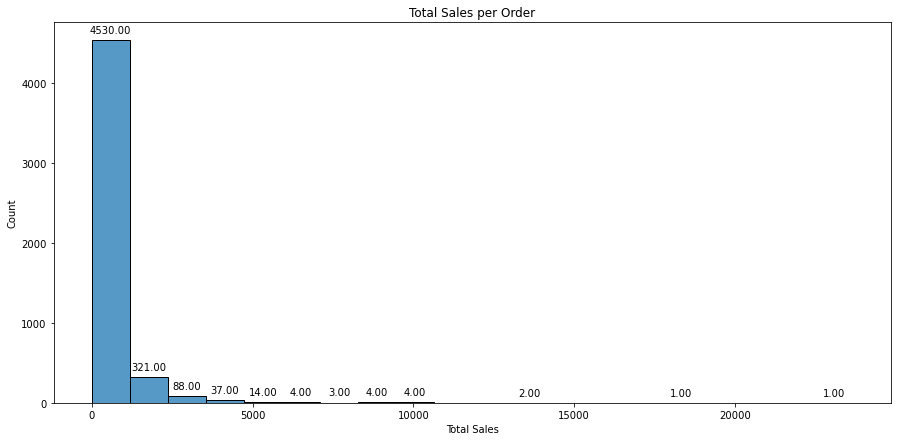

In [52]:
plt.figure( figsize = (15, 7) )
g_ts = sb.histplot(order_data, x=order_data['total_sales'], bins=20)
g_ts.set_title('Total Sales per Order')
g_ts.set_xlabel('Total Sales')
g_ts.set_ylabel('Count')
values_on_bars(g_ts)

A general overview of sales indicate that most of our sales in orders are between 1 and 1000. Intrestingly we have at least 8 orders that exeeded the 10000 in sales. 
Althogh we already talked about profit, we wanted to include profits per order.

Text(0, 0.5, 'Count')

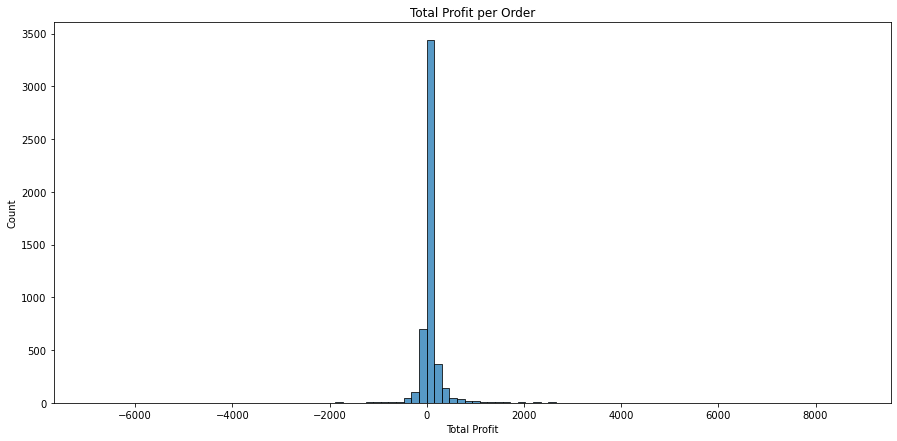

In [53]:
plt.figure( figsize = (15, 7) )
g_tp = sb.histplot(order_data, x=order_data['total_profit'], bins = 100)
g_tp.set_title('Total Profit per Order')
g_tp.set_xlabel('Total Profit')
g_tp.set_ylabel('Count')

Profits per order seem to be mostly positive but also they don't have a high value eather with most of our profits beign less that 1000. Now that we have seen profits from orders, we raised the question, how many items are in a single order.

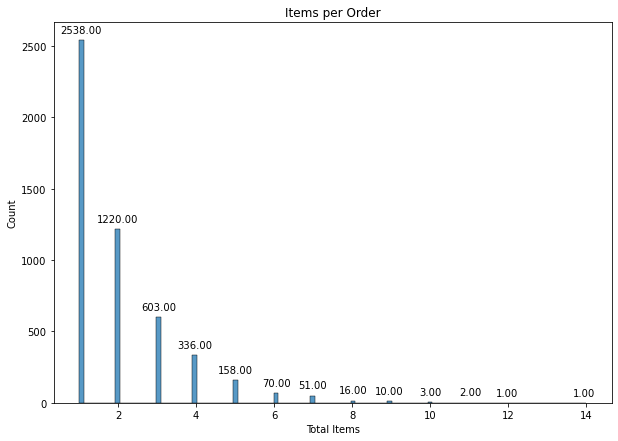

In [54]:
plt.figure( figsize = (10, 7) )
g_items = sb.histplot(order_data, x=order_data['items'])
g_items.set_title('Items per Order')
g_items.set_xlabel('Total Items')
g_items.set_ylabel('Count')
values_on_bars(g_items)

As we can observe from the graph above, a bit over half the orders contain 1 item. After this the number of items in each order decrease almost by half. Outliers in the graph are orders who have more than 10 items in the order. Finaly we wanted to measure how long it takes for orders to be delivered to customers.  

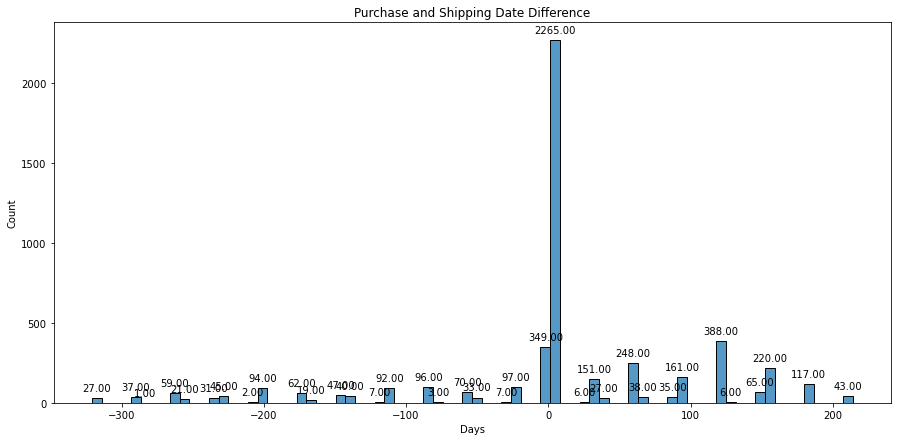

In [55]:
plt.figure( figsize = (15, 7) )
g_s=sb.histplot(order_data, x=order_data['Date_Difference'])
g_s.set_title('Purchase and Shipping Date Difference')
g_s.set_xlabel('Days')
g_s.set_ylabel('Count')
values_on_bars(g_s)

The graph above indicates the date difference from purchase and shipping. Now there is something wrong about this data, as we did a substraction in days from the date of purchase and the shipping date, since its obvious you cannot be shipped an item before you purchase it. So we can see that there are a lot of negative values meaning that the dates are wrong. The store needs to pay more attention on their dates. Anyway, from this graph alone we can appreciate that most of the positive orders are between 0 and 100 days. then we have many other orders after 100 days. Shipping time over a month is really unattractive for a company. So they should reduse the shipping times. Altho clients don't seem to mind as they keep purchasing anyways, but improving shipping dates might earn the store more clients and also encourage old clients to buy more often.